In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Product Sales Analysis\sales_data_cleaned.csv')

df.head(2)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,customername,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,month
0,10107,30,95.70,2,2871.0,2003-02-24,Shipped,1,2,2003,...,Land of Toys Inc.,NYC,NY,10022,USA,North America,Yu,Kwai,Small,February
1,10121,34,81.35,5,2765.9,2003-05-07,Shipped,2,5,2003,...,Reims Collectables,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small,May


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ordernumber       2823 non-null   int64  
 1   quantityordered   2823 non-null   int64  
 2   priceeach         2823 non-null   float64
 3   orderlinenumber   2823 non-null   int64  
 4   sales             2823 non-null   float64
 5   orderdate         2823 non-null   object 
 6   status            2823 non-null   object 
 7   qtr_id            2823 non-null   int64  
 8   month_id          2823 non-null   int64  
 9   year_id           2823 non-null   int64  
 10  productline       2823 non-null   object 
 11  msrp              2823 non-null   int64  
 12  productcode       2823 non-null   object 
 13  customername      2823 non-null   object 
 14  city              2823 non-null   object 
 15  state             2823 non-null   object 
 16  postalcode        2823 non-null   object 


## Monthly Sales Trend

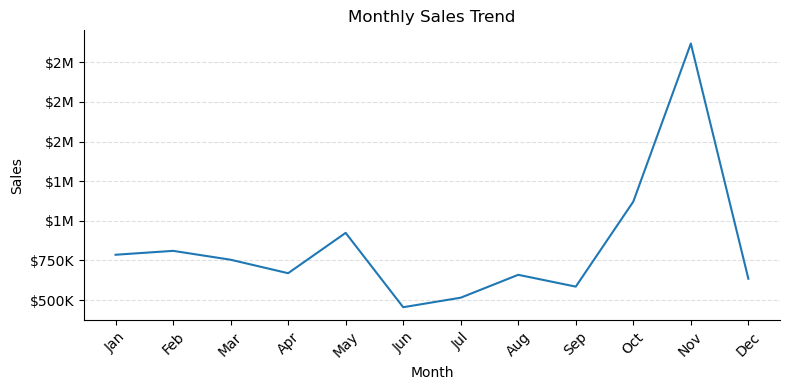

In [3]:
monthly_trend = df.groupby('month')['sales'].sum().reset_index().round(2)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')
# convert month names to abbreviations to make the plot cleaner
monthly_trend['month'] = monthly_trend['month'].str[:3]


plt.figure(figsize=(8, 4))
sns.lineplot(
    data=monthly_trend, 
    x='month', 
    y='sales', 
    palette='viridis'
    )

def currency(x, pos):
    if x >= 1e6:
        return '${:,.0f}M'.format(x * 1e-6)
    else:
        return '${:,.0f}K'.format(x * 1e-3)
    
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()


- The sales performance across the year shows **significant variation**, indicating potential seasonality or promotional impact.

## Key Observations
1. **Strongest Month:**
   - **November** experienced the highest spike in sales, surpassing **$2M**.
   - This likely corresponds with **seasonal promotions** such as Black Friday or early holiday shopping.

2. **Second Strongest Month:**
   - **October** also shows a notable increase in sales, over **$1M**, suggesting the buildup to peak season begins early.

3. **Weakest Month:**
   - **June** marked the lowest sales point, just below **$500K**.
   - This may indicate a **mid-year slump**, potentially due to lower consumer spending or limited marketing activities.

4. **Consistent Performance:**
   - Sales remained relatively stable between **January and May**, ranging around **$700K–$900K**.
   - Indicates a **moderate baseline** level of activity in the first half of the year.

5. **Sudden Drop in December:**
   - After peaking in November, **sales dropped sharply in December**, down to levels similar to early in the year.
   -----------

##  Quarterly & Yearly Trend

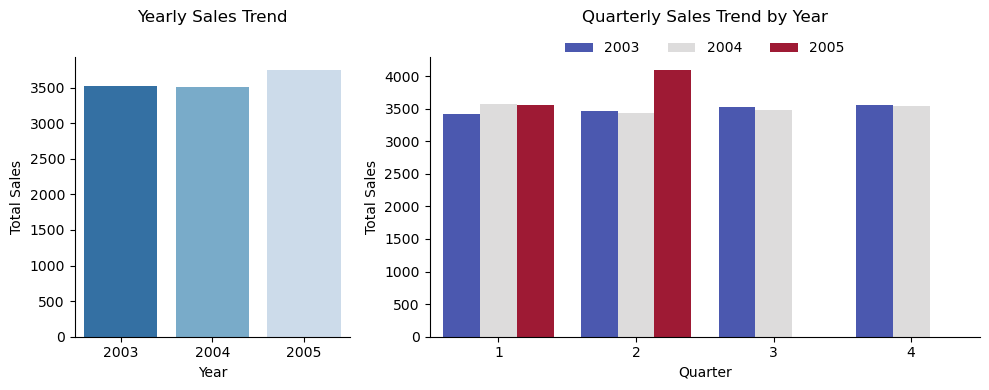

In [4]:
qrt_yr_trend = df.groupby(['year_id', 'qtr_id'])['sales'].sum().reset_index()


import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Yearly Sales Trend (smaller)
ax0 = fig.add_subplot(gs[0])
sns.barplot(data=df, x='year_id', y='sales', ax=ax0, palette='Blues_r', ci=False)
ax0.set_title("Yearly Sales Trend", pad=25)
ax0.set_xlabel("Year")
ax0.set_ylabel("Total Sales")

# Quarterly Sales Trend (larger)
ax1 = fig.add_subplot(gs[1])
sns.barplot(data=df, x='qtr_id', y='sales', hue='year_id', ax=ax1, palette='coolwarm', ci=False)
ax1.set_title("Quarterly Sales Trend by Year", pad=25)
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Total Sales")
ax1.legend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, 1.1), frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

In [5]:
df_advanced = df.copy()

df_advanced['orderdate'] = pd.to_datetime(df_advanced['orderdate'])

In [6]:
# Resample data to daily/weekly/monthly level for trend analysis
df_advanced.set_index('orderdate', inplace=True)
monthly_sales = df_advanced['sales'].resample('M').sum()

<Figure size 800x400 with 0 Axes>

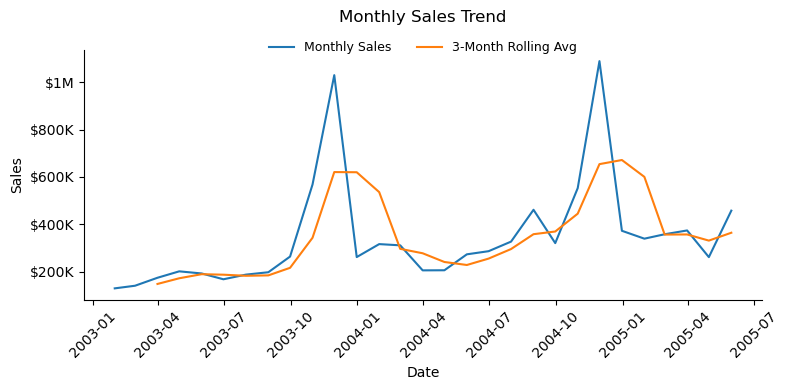

In [7]:
plt.figure(figsize=(8, 4))

# Assuming monthly_sales is a pandas Series with datetime index
rolling_avg = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(8, 4))

sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, label='Monthly Sales')
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, label='3-Month Rolling Avg')

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency)) # function definied earlier...

plt.title('Monthly Sales Trend', pad=20)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(ncols=2, fontsize=9, loc='upper center', bbox_to_anchor=(0.5, 0, 0, 1.08), frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

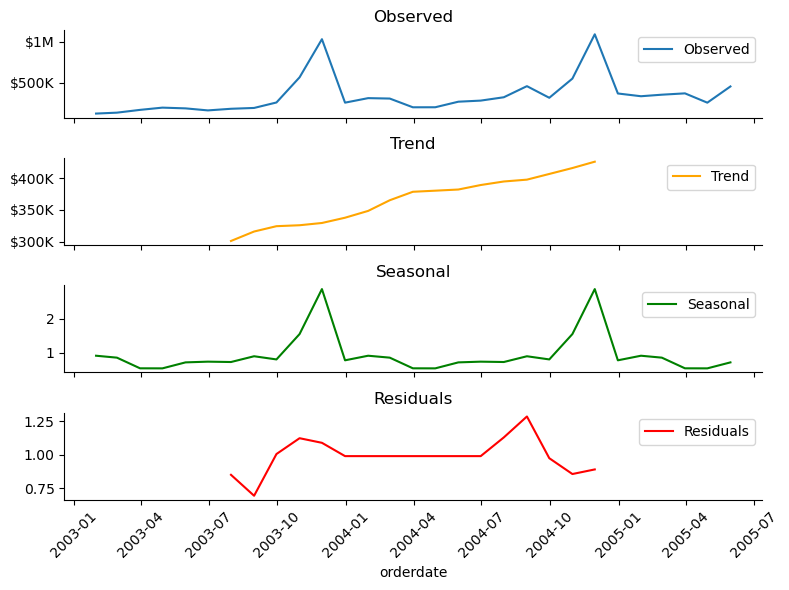

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming monthly_sales is a pandas Series with datetime index
result = seasonal_decompose(monthly_sales, model='multiplicative')

# Create a plot for each component (Observed, Trend, Seasonal, Residual)
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

# Plot the original time series (Observed)
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, ax=axes[0], label='Observed')
axes[0].set_title('Observed')

# Plot the Trend
sns.lineplot(x=result.trend.index, y=result.trend.values, ax=axes[1], label='Trend', color='orange')
axes[1].set_title('Trend')

# Plot the Seasonal component
sns.lineplot(x=result.seasonal.index, y=result.seasonal.values, ax=axes[2], label='Seasonal', color='green')
axes[2].set_title('Seasonal')

# Plot the Residuals
sns.lineplot(x=result.resid.index, y=result.resid.values, ax=axes[3], label='Residuals', color='red')
axes[3].set_title('Residuals')

axes[0].yaxis.set_major_formatter(FuncFormatter(currency))
axes[1].yaxis.set_major_formatter(FuncFormatter(currency))

plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()
